###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

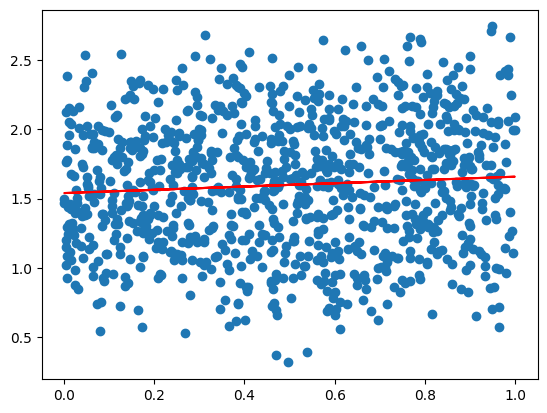

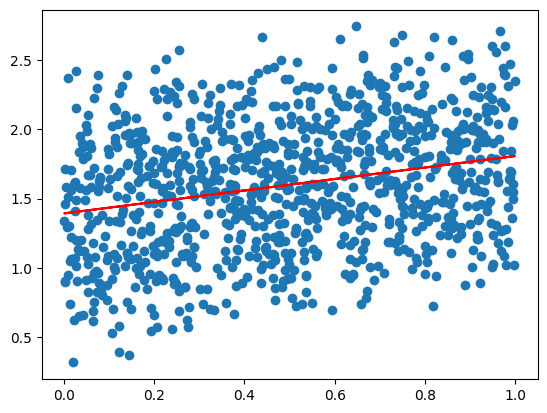

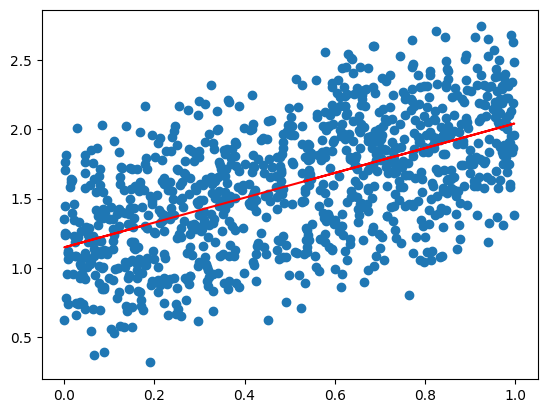

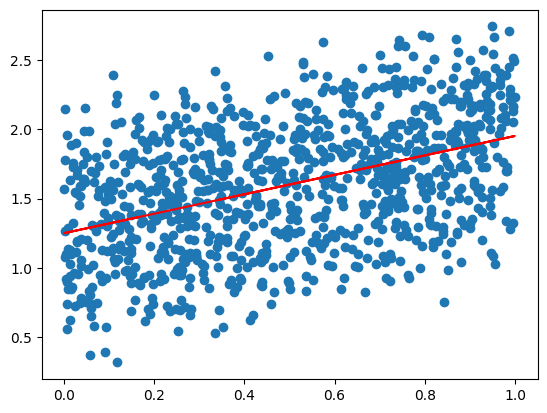

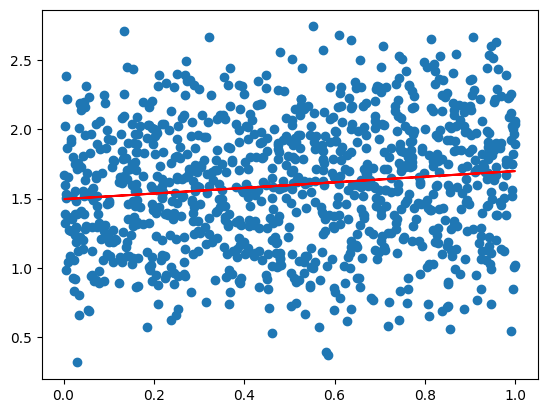

In [41]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
n_features=5
n_samples=1000
features=np.random.rand(n_samples,n_features)
weights=np.random.rand(n_features)
biases=np.random.rand(n_samples)

target=np.dot(features,weights)+biases




# Calculate coefficients using the normal equation (X^T * X)^-1 * X^T * y



for i in range(5):
    X1=np.column_stack([features[:,i],np.ones_like(features[:,i])])
    C1 = np.linalg.inv(X1.T @ X1) @ X1.T @ target
    plt.scatter(features[:,i],target)
    plt.plot(X1,C1[0]*X1+C1[1],color="red")
    plt.show()


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

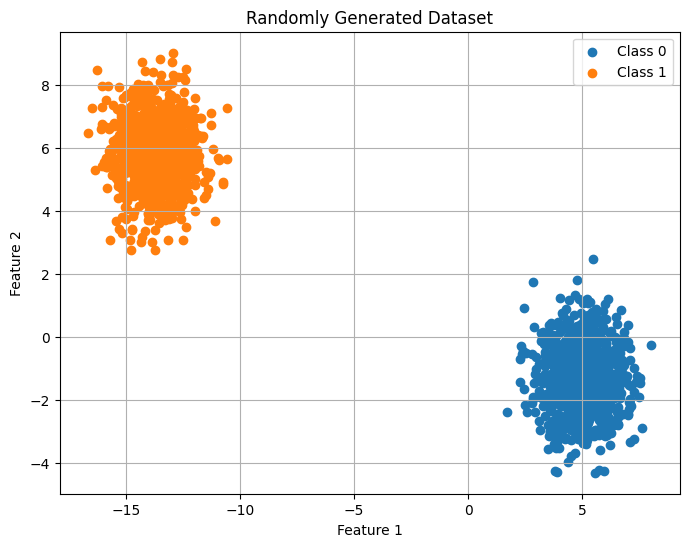

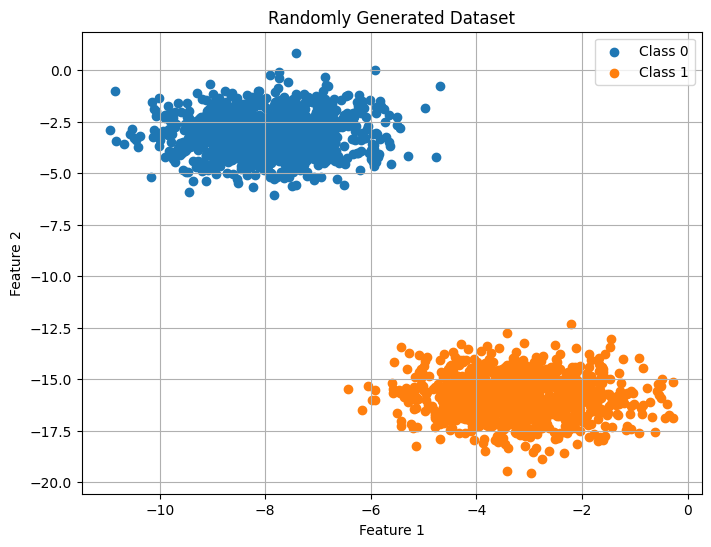

In [72]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

# Parameters
n_samples = 1000
n_features = 2 
n_classes = 2    # Number of classes
n_clusters_per_class = 2  # Number of clusters per class
cluster_std = 1.0  # Standard deviation of clusters

# Generate data for two classes with two clusters per class
X = np.zeros((n_samples * n_clusters_per_class * n_classes, n_features))
y = np.zeros(n_samples * n_clusters_per_class * n_classes)
index=0
for i in range(n_classes):
    
    for j in range(n_clusters_per_class):
        # Generate random centers for each cluster
        center = np.random.randn(n_features) * 10  # Random center for the cluster
        idx_start = (i * n_clusters_per_class + j) * n_samples
        idx_end = idx_start + n_samples
        
        # Generate data for each cluster
        X_cluster = np.random.normal(loc=center, scale=cluster_std, size=(n_samples, n_features))
        X[idx_start:idx_end] = X_cluster
        y[idx_start:idx_end] = index
        index+=1

# Plot Data

plt.figure(figsize=(8, 6))
plt.title('Randomly Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Plot points for each class
for class_label in np.unique(y):
    if class_label%2==0:
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {int(class_label/2)}')


plt.legend()
plt.grid(True)
plt.show()
# Plot Data
plt.figure(figsize=(8, 6))
plt.title('Randomly Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid(True)
for class_label in np.unique(y):
    if class_label%2!=0:
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {int(class_label/2)}')
plt.legend()
plt.show()


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

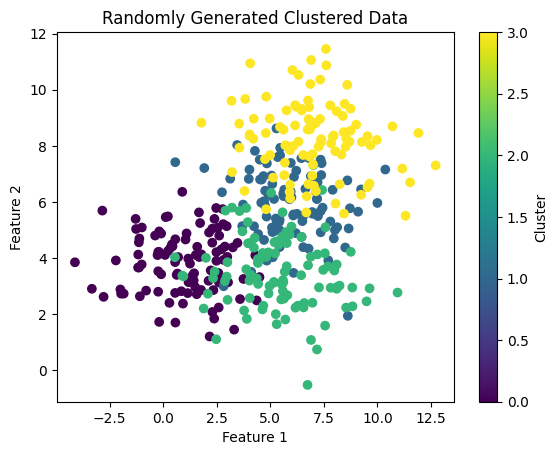

In [77]:
import numpy as np

def generate_cluster_data(num_clusters, num_points_per_cluster, num_dimensions):
   
        # Generate random cluster means
    cluster_means = np.random.rand(num_clusters, num_dimensions) * 10
        
    
        # Generate random cluster standard deviations
    cluster_std = np.random.rand(num_clusters, num_dimensions) * 2 + 1
    
    data = []
    labels = []
    
    for i in range(num_clusters):
        # Generate data points for each cluster
        cluster_data = np.random.randn(num_points_per_cluster, num_dimensions) * cluster_std[i] + cluster_means[i]
        data.append(cluster_data)
        labels.extend([i] * num_points_per_cluster)
        
    # Combine data points from different clusters
    data = np.vstack(data)
    
    return data, labels

# Example usage:
num_clusters = 4
num_points_per_cluster = 100
num_dimensions = 2

data, labels = generate_cluster_data(num_clusters, num_points_per_cluster, num_dimensions)

# Visualize the data (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Randomly Generated Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [117]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
url="https://www.worldometers.info/coronavirus/"
response=requests.get(url)
html_content=response.text
soup=BeautifulSoup(html_content,'html.parser')
tables=soup.find_all('table')


In [148]:
table=tables[2]#all three tables retrieved are same
headers=[]
header_cells=table.find_all('th')
for header_cell in header_cells:
    headers.append(header_cell.text.strip())
rows=table.find_all('tr')
data=[]
for row in rows:
    cells=row.find_all('td')
    r=[cell.text.strip() for cell in cells]
    data.append(r)
refined_data=[]
for row in data:
    
    if (len(row)>0):
        r=[row[1],row[15],row[14]]+row[2:9]
        refined_data.append(r)
print(refined_data)
columns=[headers[1],headers[15],headers[14],headers[2],headers[3],headers[4],headers[5],headers[6],headers[7],headers[8]]
df=pd.DataFrame(refined_data,columns=columns)

def rem(x):
    x=x.strip('+')
    l=x.split(',')
    if len(l)!=0:
        st=""
        for i in range(len(l)):
            st=st+l[i]
        x=st
    return x
for column in df.columns:
    df[column]=df[column].apply(rem)
    if not df[column][0].isalpha():
        df[column]=pd.to_numeric(df[column],errors='coerce')
df

[['Asia', 'Asia', '', '221,499,501', '+71', '1,553,628', '+2', '205,673,034', '+146', '14,272,839'], ['North America', 'North America', '', '131,887,981', '+1,744', '1,695,934', '+9', '127,654,320', '+8,785', '2,537,727'], ['Europe', 'Europe', '', '253,406,033', '+767', '2,101,808', '+16', '248,753,526', '+301', '2,550,699'], ['South America', 'South America', '', '70,199,664', '', '1,367,332', '', '66,683,585', '', '2,148,747'], ['Oceania', 'Australia/Oceania', '', '14,895,107', '+954', '33,015', '', '14,748,089', '', '114,003'], ['Africa', 'Africa', '', '12,860,924', '', '258,892', '', '12,090,808', '', '511,224'], ['', '', '', '721', '', '15', '', '706', '', '0'], ['World', 'All', '', '704,749,931', '+3,536', '7,010,624', '+27', '675,604,068', '+9,232', '22,135,239'], ['China', 'Asia', '1,448,471,400', '503,302', '', '5,272', '', '379,053', '', '118,977'], ['USA', 'North America', '334,805,269', '111,818,931', '+1,744', '1,219,480', '+9', '109,804,319', '+8,427', '795,132'], ['India

,"Country,Other",Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,Asia,Asia,NaN,221499501,71.0,1553628.0,2.0,205673034.0,146.0,14272839.0
1,North America,North America,NaN,131887981,1744.0,1695934.0,9.0,127654320.0,8785.0,2537727.0
2,Europe,Europe,NaN,253406033,767.0,2101808.0,16.0,248753526.0,301.0,2550699.0
3,South America,South America,NaN,70199664,NaN,1367332.0,NaN,66683585.0,NaN,2148747.0
4,Oceania,Australia/Oceania,NaN,14895107,954.0,33015.0,NaN,14748089.0,NaN,114003.0
...,...,...,...,...,...,...,...,...,...,...
242,Total:,South America,NaN,70199664,NaN,1367332.0,NaN,66683585.0,NaN,2148747.0
243,Total:,Australia/Oceania,NaN,14895107,954.0,33015.0,NaN,14748089.0,NaN,114003.0
244,Total:,Africa,NaN,12860924,NaN,258892.0,NaN,12090808.0,NaN,511224.0
245,Total:,,NaN,721,NaN,15.0,NaN,706.0,NaN,0.0


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Class distribution: Counter({0: 945, 1: 55})


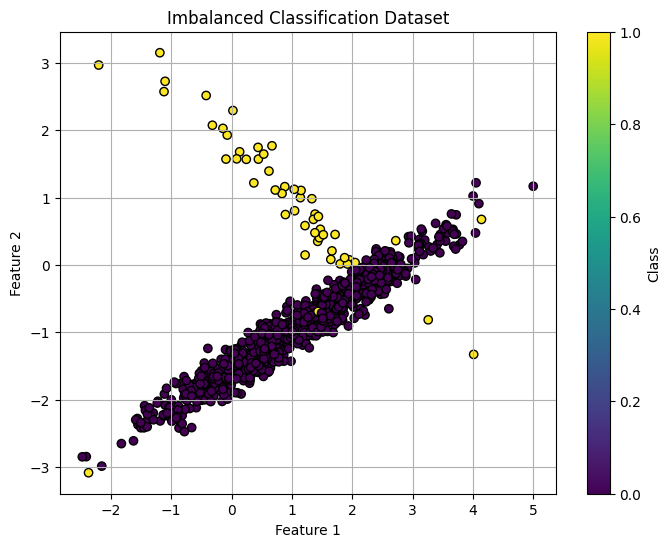

Class distribution after SMOTE: Counter({0: 945, 1: 945})


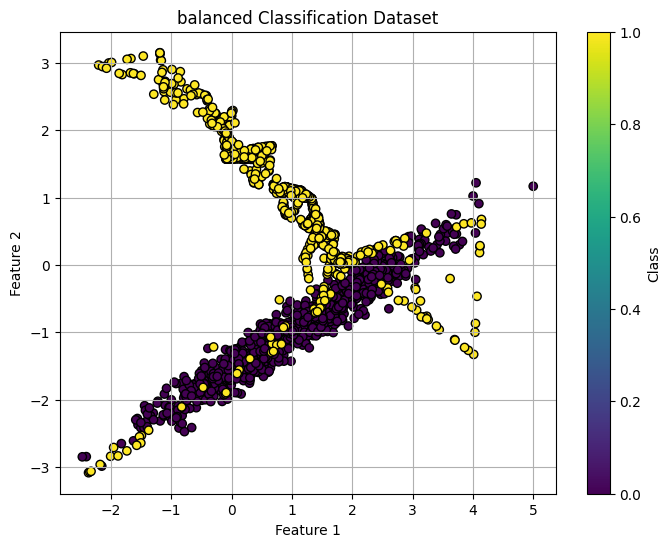

In [167]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomUnderSample 

import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
# Generate imbalanced classification dataset
n_samples = 1000
n_features = 2
n_classes=2
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_classes=n_classes,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],  # Class imbalance ratio
    random_state=42
)
class_distribution = Counter(y)
print("Class distribution:", class_distribution)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Imbalanced Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_resampled))

plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='viridis', marker='o', edgecolors='k')
plt.title(' Classification Dataset after smote')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

rus=RandomUnderSample(random_state=42)
X_resampled,y_resampled=r


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [185]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the Iris dataset
iris = load_iris()
X = iris.data 
y = iris.target
feature_name=iris.feature_names
df=pd.DataFrame(X,columns=feature_name)
print(df.head())
missing_values = df.isnull().sum()
print(missing_values)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train[0:6,:])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
(105, 4)
(45, 4)
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]]
